Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


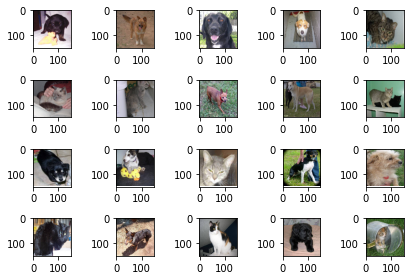

In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/Machine Learning Colab/CAT_DOG/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/Machine Learning Colab/CAT_DOG/cat_dog_small/validation'

# ImageDataGenerator를 생성
# train data를 생성해주는 ImageDataGenerator, validation data를 생성해주는 ImageDataGenerator를 각각 만들어야 해요!
# 정규화(MinMaxScaling 이용)
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,     # target directory
    classes=['cats', 'dogs'],   # cats, dogs 순서로 label 0, 1로 설정
                                # 만약 classes 속성을 생략하면 폴더 순서로 label이 결정 
    target_size=(150,150),      # 일반적으로 정사각형 행태로 resize (resize 크기는 CNN의 구조에 따라서 달라져요!)                         
    batch_size=20,              # 한번에 20개의 image 파일을 가져와서 pixel데이터로 변환
                                # label에 상관없이 가져와요!      
    class_mode='binary'         # 고양이와 멍멍이 2개의 label만 존재하기 때문에 2진분류이고 binary classification
                                # 다중분류인 경우 'categorical'을 이용해요(default 값) - (one-hot encoding)
                                # 'sparse'도 이용가능해요                    
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,             # target directory
    classes=['cats', 'dogs'],   # cats, dogs 순서로 label 0, 1로 설정
                                # 만약 classes 속성을 생략하면 폴더 순서로 label이 결정 
    target_size=(150,150),      # 일반적으로 정사각형 행태로 resize (resize 크기는 CNN의 구조에 따라서 달라져요!)                         
    batch_size=20,              # 한번에 20개의 image 파일을 가져와서 pixel데이터로 변환
                                # label에 상관없이 가져와요!      
    class_mode='binary'         # 고양이와 멍멍이 2개의 label만 존재하기 때문에 2진분류이고 binary classification
                                # 다중분류인 경우 'categorical'을 이용해요(default 값) - (one-hot encoding)
                                # 'sparse'도 이용가능해요                    
)

# generator를 이용해 보아요!
for x_data, t_data in train_generator:
    print(x_data.shape)   # (20,150,150,3)
    print(t_data.shape)   # (20,)
    break;

# 그림 이미지를 matplotlib을 이용해서 출력
fig = plt.figure()
fig_arr = list()

for i in range(20):
    fig_arr.append(fig.add_subplot(4,5,i+1))

for data_batch, label_batch in train_generator:
    for idx, img_data in enumerate(data_batch):
         fig_arr[idx].imshow(img_data)
    break;

fig.tight_layout()
plt.show()

# 다음 단계는 CNN을 구성하고 학습을 시키는 단계예요!!
# 사실 이단계는 MNIST와 유사해요! Convolution Layer와 Pooling Layer를 추가


Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


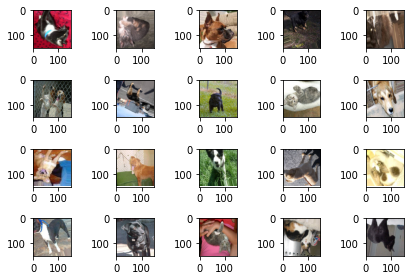

In [31]:
# 증식을 이용한 코드예요!!

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/Machine Learning Colab/CAT_DOG/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/Machine Learning Colab/CAT_DOG/cat_dog_small/validation'

# ImageDataGenerator를 생성
# train data를 생성해주는 ImageDataGenerator, validation data를 생성해주는 ImageDataGenerator를 각각 만들어야 해요!
# 정규화(MinMaxScaling 이용)
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,  # 지정된 각도 범위내에서 임의로 원본 이미지를 회전
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,    #  1-수치 혹은 1+수치만큼 확대 및 축소
                                   horizontal_flip=True,
                                   vertical_flip=True)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,     # target directory
    classes=['cats', 'dogs'],   # cats, dogs 순서로 label 0, 1로 설정
                                # 만약 classes 속성을 생략하면 폴더 순서로 label이 결정 
    target_size=(150,150),      # 일반적으로 정사각형 행태로 resize (resize 크기는 CNN의 구조에 따라서 달라져요!)                         
    batch_size=20,              # 한번에 32개의 image 파일을 가져와서 pixel데이터로 변환
                                # label에 상관없이 가져와요!      
    class_mode='binary'         # 고양이와 멍멍이 2개의 label만 존재하기 때문에 2진분류이고 binary classification
                                # 다중분류인 경우 'categorical'을 이용해요(default 값) - (one-hot encoding)
                                # 'sparse'도 이용가능해요                    
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,             # target directory
    classes=['cats', 'dogs'],   # cats, dogs 순서로 label 0, 1로 설정
                                # 만약 classes 속성을 생략하면 폴더 순서로 label이 결정 
    target_size=(150,150),      # 일반적으로 정사각형 행태로 resize (resize 크기는 CNN의 구조에 따라서 달라져요!)                         
    batch_size=20,              # 한번에 20개의 image 파일을 가져와서 pixel데이터로 변환
                                # label에 상관없이 가져와요!      
    class_mode='binary'         # 고양이와 멍멍이 2개의 label만 존재하기 때문에 2진분류이고 binary classification
                                # 다중분류인 경우 'categorical'을 이용해요(default 값) - (one-hot encoding)
                                # 'sparse'도 이용가능해요                    
)

# generator를 이용해 보아요!
for x_data, t_data in train_generator:
    print(x_data.shape)   # (20,150,150,3)
    print(t_data.shape)   # (20,)
    break;

# 그림 이미지를 matplotlib을 이용해서 출력
fig = plt.figure()
fig_arr = list()

for i in range(20):
    fig_arr.append(fig.add_subplot(4,5,i+1))

for data_batch, label_batch in train_generator:
    for idx, img_data in enumerate(data_batch):
         fig_arr[idx].imshow(img_data)
    break;

fig.tight_layout()
plt.show()

# 다음 단계는 CNN을 구성하고 학습을 시키는 단계예요!!
# 사실 이단계는 MNIST와 유사해요! Convolution Layer와 Pooling Layer를 추가


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=128,
#                  kernel_size=(3,3),
#                  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# model.add(Dense(units=512,
#                 activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1,
                activation='sigmoid'))

print(model.summary())

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

histroy = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=50
                    )

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 36992)            

In [10]:
# 학습이 종료된 후 모델을 저장할 수 있어요!!
model.save('/content/drive/MyDrive/Machine Learning Colab/CAT_DOG/cat_dog_small_cnn_tf2.4.h5')

<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


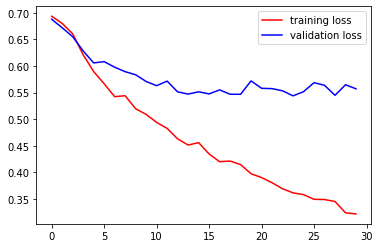

In [18]:
# history객체를 조사하면 과대적합이 발생했는지등을 알수 있어요!
print(type(histroy.history))
print(histroy.history.keys())

train_acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']

train_loss = histroy.history['loss']
val_loss = histroy.history['val_loss']

plt.plot(train_loss, color='r', label='training loss')
plt.plot(val_loss, color='b', label='validation loss')
plt.legend()
plt.show()

(150, 150, 3)
(1, 150, 150, 3)


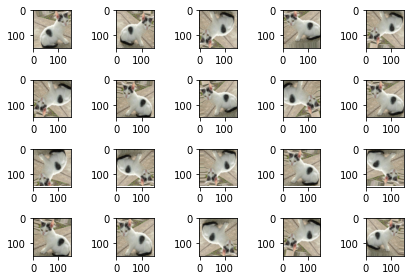

In [26]:
# Computer Vision 이미지를 다룰 때 일반적으로 사용하는 과대적합 감소방법이 있어요!
# 데이터 증식(Data Augmentation) : 기존데이터에 약간의 변형을 주어서 데이터를 추가적으로 만들어내는 기법

# %reset
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rotation_range=20,  # 지정된 각도 범위내에서 임의로 원본 이미지를 회전
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,    #  1-수치 혹은 1+수치만큼 확대 및 축소
                             horizontal_flip=True,
                             vertical_flip=True)    

img = image.load_img('/content/drive/MyDrive/Machine Learning Colab/CAT_DOG/cat_dog_small/train/cats/cat.3.jpg',
                     target_size=(150,150))

x = image.img_to_array(img)
print(x.shape)
x = x.reshape((1,) + x.shape)   # (1, 150, 150, 3)
print(x.shape)

fig = plt.figure()
fig_arr = list()

for i in range(20):
    fig_arr.append(fig.add_subplot(4,5,i+1))

idx = 0
for batch in datagen.flow(x, batch_size=1):
    fig_arr[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx % 20 == 0:
        break

fig.tight_layout()
plt.show()